AUTHOR : HAMORA HADI

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip


--2020-06-14 07:01:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.29MB/s    in 57s     

2020-06-14 07:02:28 (5.40 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
pip install split-folders

In [ ]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3829.23 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors/data/train')

['rock', 'scissors', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'scissors', 'paper']

In [ ]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
 
train_scissors_dir = os.path.join(train_dir, 'scissors')

train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')
 
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=3,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=3, 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/20
25/25 - 4s - loss: 0.2743 - accuracy: 0.8800 - val_loss: 0.3859 - val_accuracy: 0.8667
Epoch 2/20
25/25 - 4s - loss: 0.2531 - accuracy: 0.8800 - val_loss: 0.1199 - val_accuracy: 1.0000
Epoch 3/20
25/25 - 4s - loss: 0.1702 - accuracy: 0.9467 - val_loss: 1.1404 - val_accuracy: 0.6667
Epoch 4/20
25/25 - 4s - loss: 0.6370 - accuracy: 0.8400 - val_loss: 0.3650 - val_accuracy: 0.9333
Epoch 5/20
25/25 - 4s - loss: 0.3459 - accuracy: 0.8667 - val_loss: 0.5105 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 4s - loss: 0.2109 - accuracy: 0.9333 - val_loss: 0.2615 - val_accuracy: 0.8667
Epoch 7/20
25/25 - 4s - loss: 0.2095 - accuracy: 0.9200 - val_loss: 0.3165 - val_accuracy: 0.8667
Epoch 8/20
25/25 - 4s - loss: 0.2294 - accuracy: 0.8933 - val_loss: 0.2237 - val_accuracy: 0.9333
Epoch 9/20
25/25 - 4s - loss: 0.2607 - accuracy: 0.8933 - val_loss: 0.7703 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 4s - loss: 0.1064 - accuracy: 0.9733 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 11/20
25/25 -

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx.png
Saving 0P6uxM8Vr1DwySHe.png to 0P6uxM8Vr1DwySHe (3).png
Saving 0zoQAmDFXehOZsAp.png to 0zoQAmDFXehOZsAp.png
0Og76sl5CJhbxWWx.png
kertas
0P6uxM8Vr1DwySHe.png
batu
0zoQAmDFXehOZsAp.png
gunting


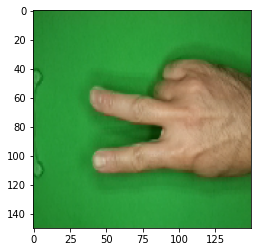

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  hasil = np.argmax(classes)
  
  print(fn)
  if hasil == 0:
    print('kertas')

  elif hasil == 1:
    print('batu')

  elif hasil == 2:
    print('gunting')